In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Папка с кадрами
img_folder = r"C:\\Users\\User\\Desktop\\drones\\opt_dan\\downloads\\0000\\frames"

# Сортировка файлов
images = sorted(os.listdir(img_folder))

# Чтение первого кадра
img_path = os.path.join(img_folder, images[0])
old_frame = cv2.imread(img_path)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

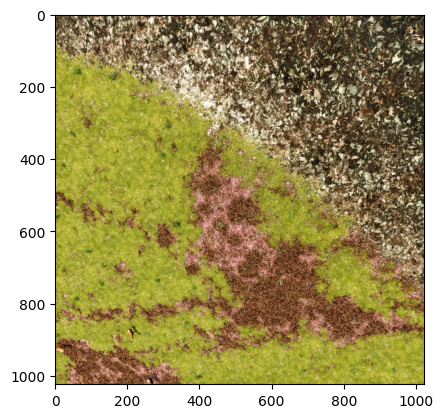

In [3]:
img_path = os.path.join(img_folder, images[200])
frame = cv2.imread(img_path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [5]:
frame.shape

(1024, 1024, 3)

In [25]:
img = frame
# 720p → 1280x720
img_720p = cv2.resize(img, (1280, 720))

# 480p → 640x480
img_480p = cv2.resize(img, (640, 480))

# 240p → 426x240 (16:9) или 320x240 (4:3)
img_240p = cv2.resize(img, (426, 240))

img_160p = cv2.resize(img, (284, 160))

# 144p 16:9
img_144p = cv2.resize(img, (256, 144))

# 120p 16:9
img_120p = cv2.resize(img, (213, 120))

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_inlier_matches(img1, img2, kp1, kp2, matches, mask):
    # Берём только инлайеры
    inlier_matches = [m for i, m in enumerate(matches) if mask[i]]

    # cv2.drawMatches рисует одну большую картинку с соединёнными изображениями
    matched_img = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        inlier_matches,
        None,
        matchColor=(255, 0, 0),   # линии будут красные
        singlePointColor=(0, 0, 255), # ключевые точки - красные кружки
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # OpenCV рисует в BGR, matplotlib ждёт RGB
    matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

    # Выводим через matplotlib
    plt.figure(figsize=(15, 7))
    plt.imshow(matched_img)
    plt.axis("off")
    plt.show()


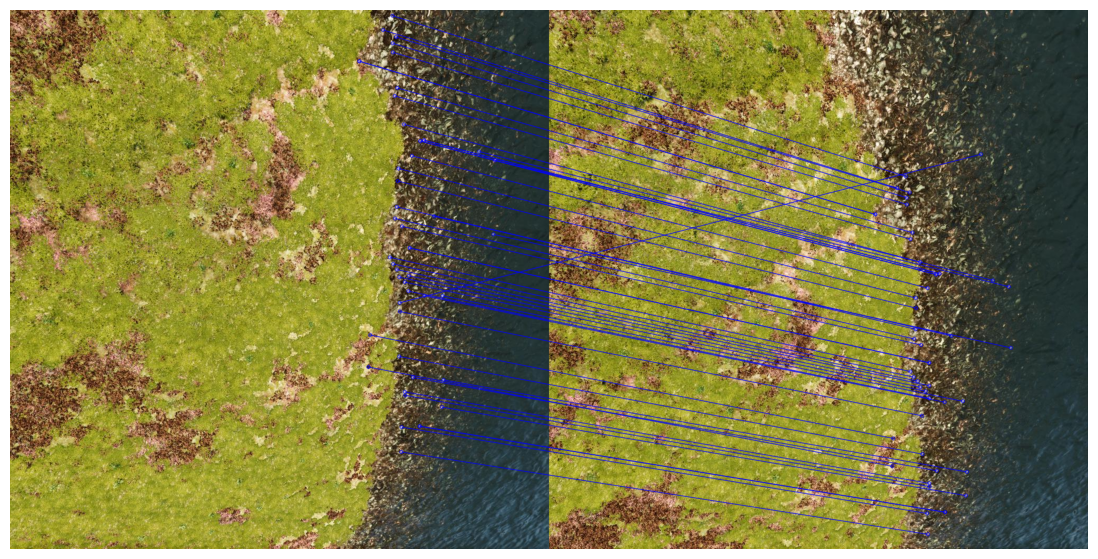

In [8]:
img_path = os.path.join(img_folder, images[1])
img1 = cv2.imread(img_path)
img_path = os.path.join(img_folder, images[19])
img2 = cv2.imread(img_path)
max_features = 1000 # ограничиваем количество точек которое будет выявлять детектор
sift = cv2.SIFT_create(nfeatures=max_features)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # Метод сопоставления дескрипторов с  cv2.NORM_L2 (евклидово расстояние)
focal_length = 512.0
principal_point = (focal_length,focal_length)

old_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
frame_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

keypoints_prev, descriptors_prev = sift.detectAndCompute(old_gray, None)
keypoints_cur, descriptors_cur = sift.detectAndCompute(frame_gray, None)

matches = bf.match(descriptors_prev, descriptors_cur)
matches = matches[:200]

pts_prev = np.float32([keypoints_prev[m.queryIdx].pt for m in matches])
pts_curr = np.float32([keypoints_cur[m.trainIdx].pt for m in matches])


E, mask = cv2.findEssentialMat(pts_curr, pts_prev, focal=focal_length, pp=principal_point, method=cv2.RANSAC, prob=0.999, threshold=1.0)



draw_inlier_matches(img1, img2, keypoints_prev, keypoints_cur, matches, mask.ravel().tolist())


In [16]:
frame.shape[:2]

(1024, 1024)

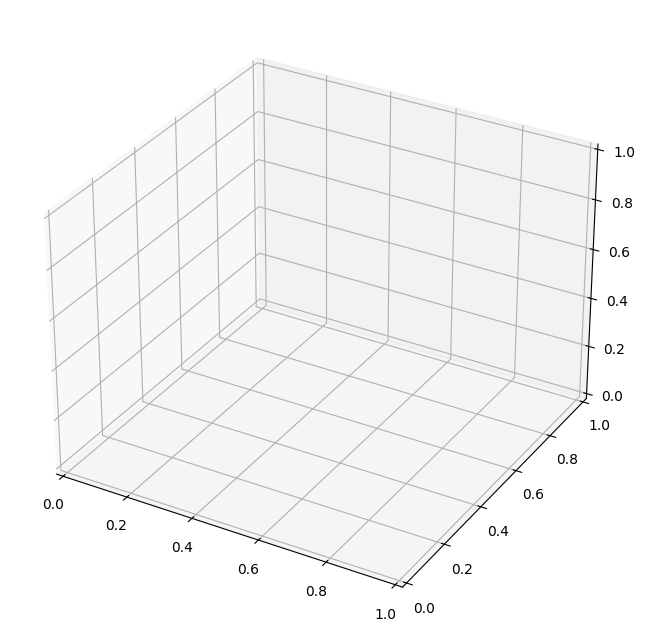

In [17]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')




# Папка с кадрами
img_folder = r"C:\\Users\\User\\Desktop\\drones\\opt_dan\\downloads\\0000\\frames"

# Сортировка файлов
images = sorted(os.listdir(img_folder))

# Чтение первого кадра
img_path = os.path.join(img_folder, images[0])
old_frame = cv2.imread(img_path)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)


# Параметры камеры
focal_length = 512.0
height, width = old_frame.shape[:2]
principal_point = (width/2, height/2)
K = np.array([[focal_length, 0, principal_point[0]],
              [0, focal_length, principal_point[1]],
              [0, 0, 1]])


trajectory = []

# Начальная позиция камеры


orb = cv2.ORB_create(nfeatures=2000, scaleFactor=1.2, nlevels=8)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [45]:
img_path = os.path.join(img_folder, images[5])
frame = cv2.imread(img_path)
img_path = os.path.join(img_folder, images[1])
old_frame = cv2.imread(img_path)

frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)


keypoints_cur = orb.detect(frame_gray, None)
keypoints_perv = orb.detect(old_gray, None)

# Вычисление дескрипторов
keypoints_cur, descriptors_cur = orb.compute(frame_gray, keypoints_cur)
keypoints_perv, descriptors_perv = orb.compute(old_gray, keypoints_perv)

matches = bf.match(descriptors_perv, descriptors_cur)
matches = sorted(matches, key=lambda x: x.distance)[:200]




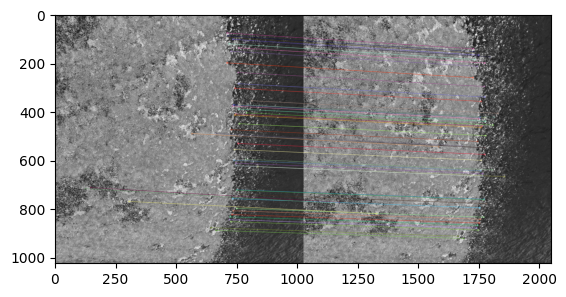

In [46]:
img_matches = cv2.drawMatches(old_gray, keypoints_perv, frame_gray, keypoints_cur, matches[:50], None, flags=2)
plt.imshow(img_matches)

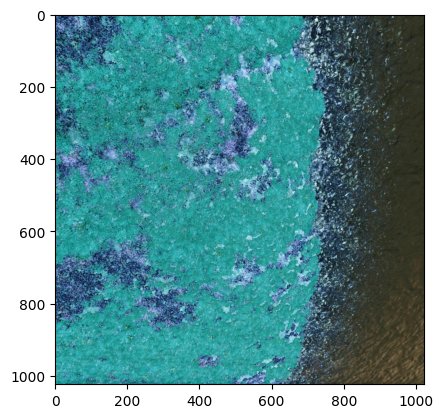

In [40]:
plt.imshow(old_frame)

In [52]:
# 2. Получение координат соответствующих точек
pts_prev = np.float32([keypoints_perv[m.queryIdx].pt for m in matches])
pts_cur  = np.float32([keypoints_cur[m.trainIdx].pt for m in matches])

# 3. Находим Essential Matrix с RANSAC
E, mask = cv2.findEssentialMat(pts_cur, pts_prev, focal=focal_length, pp=principal_point, method=cv2.RANSAC, prob=0.999, threshold=1.0)

# mask содержит 1 для inliers и 0 для outliers
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]

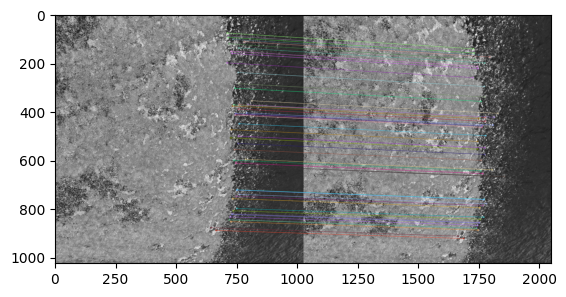

In [53]:
img_inliers = cv2.drawMatches(old_gray, keypoints_perv, frame_gray, keypoints_cur, inlier_matches[:50], None, flags=2)
plt.imshow(img_inliers)


In [ ]:
def AbsoluteTrajectoryError(gt,od):
    return np.sqrt(np.mean( ( (gt - od)**2 ).sum(axis = 1) ) )

In [39]:
gt = [[1,1],[2,2], [3,3],[4,4]]
od = [[1.1,1.5],[2.3,2.8], [3.3,3.3],[4.5,4.6]]

gt = np.array(gt)
od = np.array(od)

In [ ]:
(((gt - od)**2).sum(axis = 1))**0.5

array([0.50990195, 0.85440037, 0.42426407, 0.78102497])

In [46]:
np.linalg.norm(gt - od, axis=1)

array([0.50990195, 0.85440037, 0.42426407, 0.78102497])

In [ ]:
print(traj_loaded.shape)


(8818, 3)


In [ ]:
print(traj_optflow.shape)

(2204, 2)


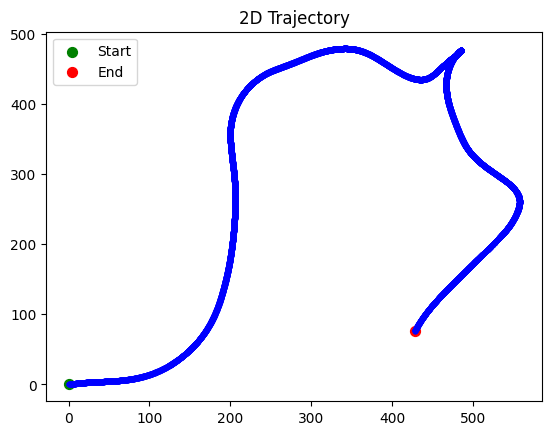

In [9]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

traj_loaded = np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\trajectory.npy")

traj = traj_loaded
# Основная траектория
plt.plot(traj[:,0], traj[:,1], '-o', color='blue', markersize=3)

# Начальная точка — зелёная
plt.scatter(traj[0,0], traj[0,1], color='green', s=50, label='Start')

# Конечная точка — красная
plt.scatter(traj[-1,0], traj[-1,1], color='red', s=50, label='End')

# plt.gca().invert_yaxis()  # чтобы направление Y было привычное
plt.title("2D Trajectory")
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_19488\2618507003.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


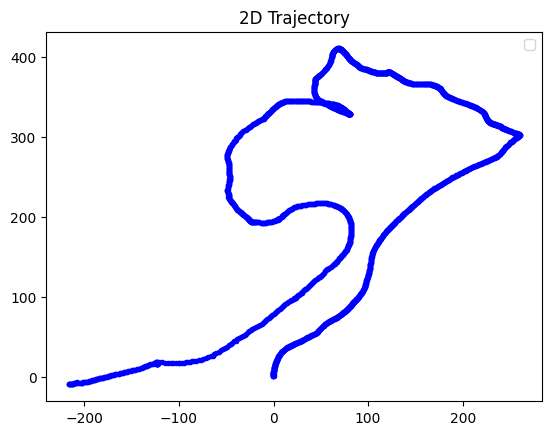

In [5]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

traj_loaded = np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\optflow_trajectory_rot.npy")

traj = traj_loaded
# Основная траектория
plt.plot(traj[:,0], traj[:,1], '-o', color='blue', markersize=3)

# # Начальная точка — зелёная
# plt.scatter(traj[0,0], traj[0,1], color='green', s=50, label='Start')

# # Конечная точка — красная
# plt.scatter(traj[-1,0], traj[-1,1], color='red', s=50, label='End')

# plt.gca().invert_yaxis()  # чтобы направление Y было привычное
plt.title("2D Trajectory")
plt.legend()
plt.show()


In [9]:
traj_optflow= np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\optflow_trajectory.npy")
traj_optflow.shape[0]

2204

In [12]:
import itertools
import pandas as pd

feature_grid = {
    'maxCorners': [200, 500, 1000],
    'qualityLevel': [0.01, 0.03, 0.05],
    'minDistance': [5, 7, 10]
}

lk_grid = {
    'winSize': [(15,15), (21,21), (31,31)],
    'maxLevel': [2, 3, 4],
    'minEigThreshold': [1e-4, 1e-3, 1e-2]
}

# собираем все комбинации
all_combinations = []
for fc, ql, md in itertools.product(feature_grid['maxCorners'],
                                    feature_grid['qualityLevel'],
                                    feature_grid['minDistance']):
    for ws, ml, me in itertools.product(lk_grid['winSize'],
                                        lk_grid['maxLevel'],
                                        lk_grid['minEigThreshold']):
        all_combinations.append({
            'maxCorners': fc,
            'qualityLevel': ql,
            'minDistance': md,
            'winSize': ws,
            'maxLevel': ml,
            'minEigThreshold': me
        })

df = pd.DataFrame(all_combinations)

import caas_jupyter_tools
caas_jupyter_tools.display_dataframe_to_user("Все комбинации параметров (729 штук)", df)


ModuleNotFoundError: No module named 'caas_jupyter_tools'

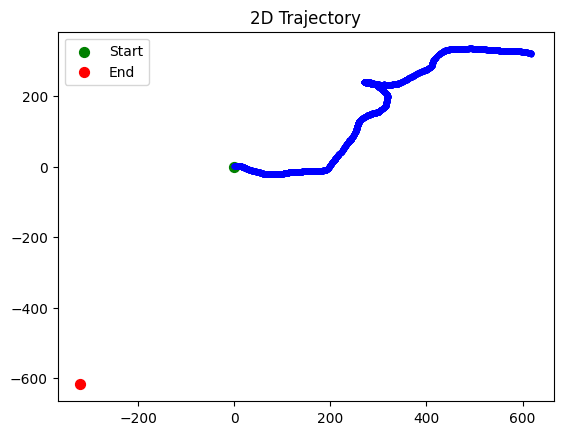

In [6]:
from scipy.interpolate import interp1d
import numpy as np

traj_optflow= np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\best_trajectory.npy")

# gt_time = np.arange(8818)        # индексы GT
# od_time = np.linspace(0, 8817, 2204)  # индексы твоей траектории

# traj_interp = np.zeros((8818, 2))
# for i in range(2):  # x и y
#     f = interp1d(od_time, traj_optflow[:, i], kind='linear')
#     traj_interp[:, i] = f(gt_time)



traj = traj_optflow
# Основная траектория
plt.plot(-1*traj[:,1], -1*traj[:,0], '-o', color='blue', markersize=3)

# Начальная точка — зелёная
plt.scatter(traj[0,0], traj[0,1], color='green', s=50, label='Start')

# Конечная точка — красная
plt.scatter(traj[-1,0], traj[-1,1], color='red', s=50, label='End')

# plt.gca().invert_yaxis()  # чтобы направление Y было привычное
plt.title("2D Trajectory")
plt.legend()
plt.show()


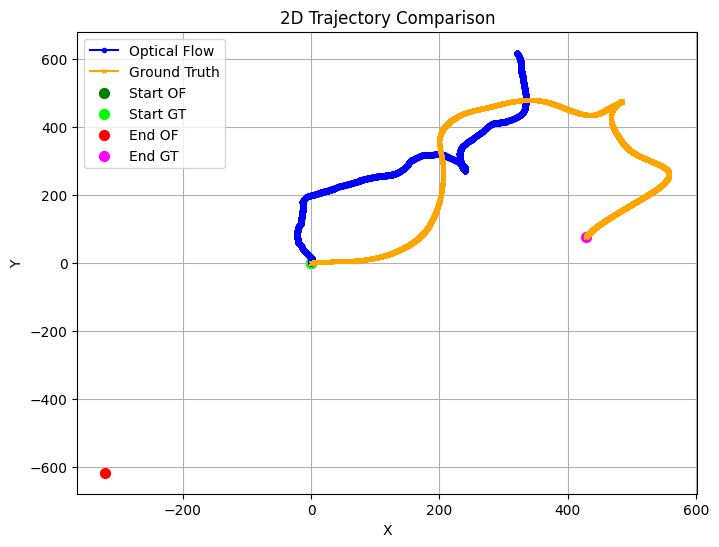

In [4]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Загружаем траектории
traj_optflow = np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\best_trajectory.npy")
gt_traj = np.load("C:\\Users\\User\\Desktop\\drones\\opt_dan\\coords\\trajectory.npy")
gt_traj = gt_traj[:, :2]

# Временные индексы
gt_time = np.arange(gt_traj.shape[0])        # индексы GT
od_time = np.linspace(0, gt_traj.shape[0]-1, traj_optflow.shape[0])  # индексы опт. потока

# Интерполяция опт. потока к GT
traj_interp = np.zeros_like(gt_traj)
for i in range(2):
    f = interp1d(od_time, traj_optflow[:, i], kind='linear')
    traj_interp[:, i] = f(gt_time)

# Построение графика
plt.figure(figsize=(8,6))

# Оптический поток
plt.plot(-1*traj_interp[:,0], -1*traj_interp[:,1], '-o', color='blue', markersize=3, label='Optical Flow')

# Ground Truth
plt.plot(gt_traj[:,0], gt_traj[:,1], '-x', color='orange', markersize=3, label='Ground Truth')

# Начальные точки
plt.scatter(traj_interp[0,0], traj_interp[0,1], color='green', s=50, label='Start OF')
plt.scatter(gt_traj[0,0], gt_traj[0,1], color='lime', s=50, label='Start GT')

# Конечные точки
plt.scatter(traj_interp[-1,0], traj_interp[-1,1], color='red', s=50, label='End OF')
plt.scatter(gt_traj[-1,0], gt_traj[-1,1], color='magenta', s=50, label='End GT')

plt.title("2D Trajectory Comparison")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [63]:
traj_interp.shape

(8818, 2)

In [ ]:

def merge(f,s):
    i = 0
    I = len(f)
    j = 0
    J = len(s) 
    res = []
    while True:
        if i < I and j < J:
            if f[i] < s[j]:
                res.append(f[i])
                i = i + 1
            else: 
                res.append(s[j])
                j = j + 1
        elif i < I:
            res.append(f[i])
            i = i + 1
        elif j < J:
            res.append(s[j])
            j = j + 1
        else: 
            return res
        
def splitAnDmerge(a):
    N = len(a)//2
    a1 = a[:N]
    a2 = a[N:]

    print(f"a1 = {a1}       a2 = {a2}")
    if len(a1) > 1:
        a1 = splitAnDmerge(a1)
    if len(a2) > 1:
        a2 = splitAnDmerge(a2)
    print(f"в мердж кладутся a1 = {a1}       a2 = {a2}")
    return merge(a1,a2)

In [14]:
def splitAnDmerge(a):
    N = len(a)//2
    a1 = a[:N]
    a2 = a[N:]

    print(f"a1 = {a1}       a2 = {a2}")
    if len(a1) > 1:
        a1 = splitAnDmerge(a1)
    if len(a2) > 1:
        a2 = splitAnDmerge(a2)
    print(f"в мердж кладутся a1 = {a1}       a2 = {a2}")
    return merge(a1,a2)

In [12]:
mas = [9,5,-3,4,7,8]
splitAnDmerge(mas)

a1 = [9, 5, -3]       a2 = [4, 7, 8]
a1 = [9]       a2 = [5, -3]
a1 = [5]       a2 = [-3]
в мердж кладутся a1 = [5]       a2 = [-3]
в мердж кладутся a1 = [9]       a2 = [-3, 5]
a1 = [4]       a2 = [7, 8]
a1 = [7]       a2 = [8]
в мердж кладутся a1 = [7]       a2 = [8]
в мердж кладутся a1 = [4]       a2 = [7, 8]
в мердж кладутся a1 = [-3, 5, 9]       a2 = [4, 7, 8]


[-3, 4, 5, 7, 8, 9]

In [ ]:
mas = [9,5,-3,4,7,8,-8]
splitAnDmerge(mas)

In [10]:
import random

In [11]:
def quic_sort(a):
    print(a)
    if len(a) > 1:
        x = a[random.randint(0, len(a)-1)]
        low = [u for u in a if u < x]
        eq = [u for u in a if u == x]
        hi = [u for u in a if u > x]
        print(f"x = {x} low = {low} hi = {hi}")
        a = quic_sort(low) + eq + quic_sort(hi)
        print(f"result a = {a}")
    return a

In [12]:
a = [9, 5, -3, 4, 7, 8, -8]
a = quic_sort(a)

[9, 5, -3, 4, 7, 8, -8]
x = 8 low = [5, -3, 4, 7, -8] hi = [9]
[5, -3, 4, 7, -8]
x = 7 low = [5, -3, 4, -8] hi = []
[5, -3, 4, -8]
x = 4 low = [-3, -8] hi = [5]
[-3, -8]
x = -8 low = [] hi = [-3]
[]
[-3]
result a = [-8, -3]
[5]
result a = [-8, -3, 4, 5]
[]
result a = [-8, -3, 4, 5, 7]
[9]
result a = [-8, -3, 4, 5, 7, 8, 9]


In [9]:
a

[-8, -3, 4, 5, 7, 8, 9]